In [1]:
import numpy as np
from datascience import *

# Configure notebook (happens automatically on data8.berkeley.edu)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

In [2]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    "Compute r."
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

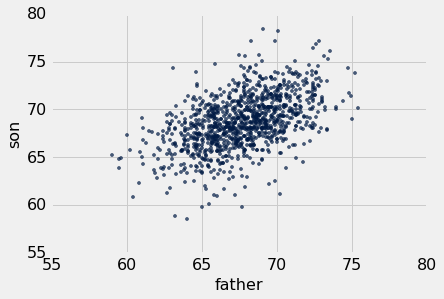

In [7]:
heights = Table.read_table('heights.csv')
heights.scatter('father', 'son', s=10)

In [5]:
heights.num_rows

1078

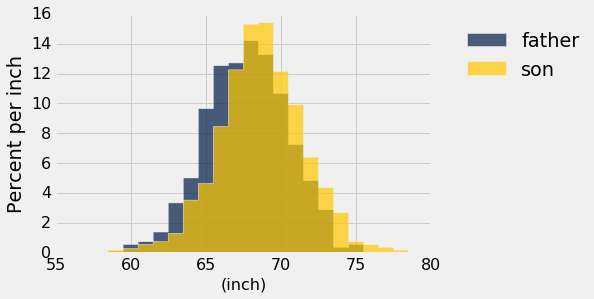

In [8]:
heights.hist(bins=np.arange(55.5, 80, 1), unit='inch')

In [20]:
son_average = np.mean(heights.column('son'))
father_average = np.mean(heights.column('father'))
son_average - father_average

0.99740259740261195

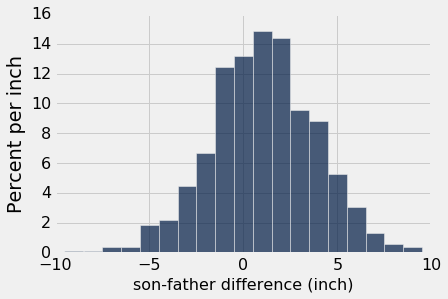

In [12]:
diffs = Table().with_column('son-father difference',
    heights.column('son') - heights.column('father'))
diffs.hist(bins=np.arange(-9.5, 10, 1), unit='inch')

In [13]:
r = correlation(heights, 'father', 'son')
r

0.50116268080759108

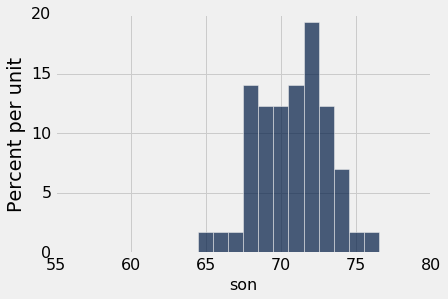

In [14]:
six_foot_fathers = heights.where(np.round(heights.column('father')) == 72)
six_foot_fathers.hist('son', bins=np.arange(55.5, 80, 1))

In [15]:
np.count_nonzero(six_foot_fathers.column('son') < 72) / six_foot_fathers.num_rows

0.6842105263157895

In [16]:
np.mean(six_foot_fathers.column('son'))

70.728070175438603

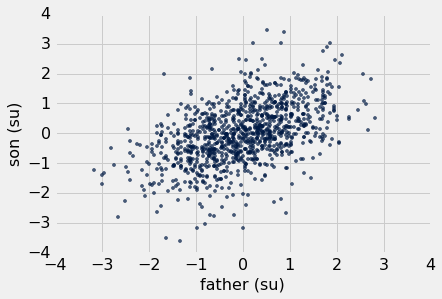

In [19]:
father_su = standard_units(heights['father'])
son_su = standard_units(heights['son'])
heights_su = Table().with_columns([
        'father (su)', father_su,
        'son (su)', son_su
    ])
heights_su.scatter('father (su)', s=10)

In [23]:
(72-father_average)/np.std(heights.column('father'))

1.5715390503947599